In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("chemical.csv")
print(df.shape)
print(df.info())


(14009, 62)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14009 entries, 0 to 14008
Data columns (total 62 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Y.ECH.yectij201.pv//ALC TO J-201A/B/C TEMP._PV         14009 non-null  float64
 1   Y.ECH.yectij202.pv//CL2 TO J-202A/B/C TEMP._PV         14009 non-null  float64
 2   Y.ECH.yectij2032.pv//I.W TO P-201A/B/C TEMP._PV        14009 non-null  float64
 3   Y.ECH.yecficj203b.pv//WATER TO P-201A/B/C FLOW_PV      14009 non-null  float64
 4   Y.ECH.yectir201.pv//J-201A/B/C TO TK-204 TEMP._PV      14009 non-null  float64
 5   Y.ECH.yeclick204.pv//TK-204 LEVEL_PV                   14009 non-null  float64
 6   Y.ECH.yecfick204.pv//PVC WASTE WATER TO TK204_PV       14009 non-null  float64
 7   Y.ECH.yecpicv204.pv//TK-204 PRESS._PV                  14009 non-null  float64
 8   Y.ECH.YECTICE203.PV//TK-204 RECYCL

In [5]:
df.describe()

,Y.ECH.yectij201.pv//ALC TO J-201A/B/C TEMP._PV,Y.ECH.yectij202.pv//CL2 TO J-202A/B/C TEMP._PV,Y.ECH.yectij2032.pv//I.W TO P-201A/B/C TEMP._PV,Y.ECH.yecficj203b.pv//WATER TO P-201A/B/C FLOW_PV,Y.ECH.yectir201.pv//J-201A/B/C TO TK-204 TEMP._PV,Y.ECH.yeclick204.pv//TK-204 LEVEL_PV,Y.ECH.yecfick204.pv//PVC WASTE WATER TO TK204_PV,Y.ECH.yecpicv204.pv//TK-204 PRESS._PV,Y.ECH.YECTICE203.PV//TK-204 RECYCLE TEMP CTRL_PV,Y.ECH.yeclicd220a.pv//D-220A LEVEL_PV,...,Y.ECH.YECTIT2222.PV//T-222 TRAY #21 TEMP._PV,Y.ECH.YECTIT2226.PV//T-222 BOTTOM TEMP._PV,Y.ECH.yecfict2232.pv//HEAVIES TO TK-801 FLOW_PV,Y.ECH.yeclicd227.pv//D-227 LEVEL_PV,Y.ECH.yectice232.pv//T-222 TO E-232 INLET TEMP._PV,Y.ECH.yectie2203.pv//T-220B TO E-220B TEMP._PV,Y.ECH.yectice227a.pv//T-220A REFLUX TEMP._PV,Y.ECH.yecpit222a.pv//T-222 BOTTOM PRESS._PV,ALC,ECH_target
count,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,...,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000,14009.000000
mean,22.475739,49.490711,22.227887,27.943901,45.240997,76.873176,22.897748,17.889746,45.130424,25.000387,...,72.493345,127.592849,568.846452,26.688014,44.786076,101.461933,88.637587,-0.687697,3066.776454,3058.183840
std,5.006147,3.254026,5.070679,11.422307,6.373286,1.961639,6.914159,13.090134,1.519086,0.774951,...,0.392340,0.703977,68.863550,7.407170,1.734737,0.282137,4.195659,0.006261,18.759773,42.624565
min,11.107742,35.998387,10.889355,0.000000,-88.510323,67.024194,0.000000,-4.413548,-5.141665,4.345055,...,71.159204,124.939728,342.925768,8.913776,40.960664,99.680330,64.657802,-0.703320,3035.180645,2950.369751
25%,18.464516,46.895806,18.719677,22.559677,44.859355,75.563871,20.438387,10.310323,44.858951,24.994286,...,72.202091,127.179241,520.123527,23.188423,43.420747,101.314615,89.810769,-0.690000,3049.960323,3031.656224
50%,22.252903,48.927097,21.167419,27.441613,45.181935,76.960645,24.925484,18.747742,45.181259,25.000220,...,72.460049,127.684815,561.672905,24.120166,44.669668,101.482857,89.980330,-0.690000,3067.341935,3059.859793
75%,26.428387,52.266452,25.935484,32.571613,45.483871,78.250323,27.173226,20.101935,45.483395,25.006154,...,72.728952,128.113576,614.333236,25.007386,45.938050,101.610220,90.052308,-0.680000,3079.210000,3085.648465
max,35.575161,57.773226,95.400645,85.335806,567.332903,85.063871,34.130968,126.150968,48.274011,45.023956,...,73.899558,129.507964,806.080415,89.182490,50.032158,103.582308,95.032308,-0.670000,3109.720645,3199.398714


In [7]:
df_control = pd.read_csv("chemical_control_features.csv")
print(df_control.shape)

(12, 3)


In [8]:
control_tags = df_control['tag'].tolist()
positions = []
for tag in control_tags:
    try:
        idx = df.columns.get_loc(tag)
        positions.append(idx)
    except KeyError:
        positions.append(None)
df_positions = pd.DataFrame(
    {'tag': control_tags, 'column_index_0_based': positions})
df_positions

,tag,column_index_0_based
0,Y.ECH.yectice232.pv//T-222 TO E-232 INLET TEMP...,56
1,Y.ECH.yectict2210.pv//T-221 OVHD TEMP_PV,40
2,Y.ECH.YECTIT2226.PV//T-222 BOTTOM TEMP._PV,53
3,Y.ECH.yectice227b.pv//T-220B REFLUX TEMP._PV,34
4,Y.ECH.yectie2201.pv//T-220A TO E-220A TEMP._PV,17
5,Y.ECH.yectie2203.pv//T-220B TO E-220B TEMP._PV,57
6,Y.ECH.yecfics2201.pv//P-204A/B TO T-220A FLOW_PV,23
7,Y.ECH.yecfics2203.pv//P-204AB TO T-220B FLOW_PV,24
8,Y.ECH.yectice227a.pv//T-220A REFLUX TEMP._PV,58
9,Y.ECH.yectit2215.pv//T-221 BOTTOM TEMP._PV,39


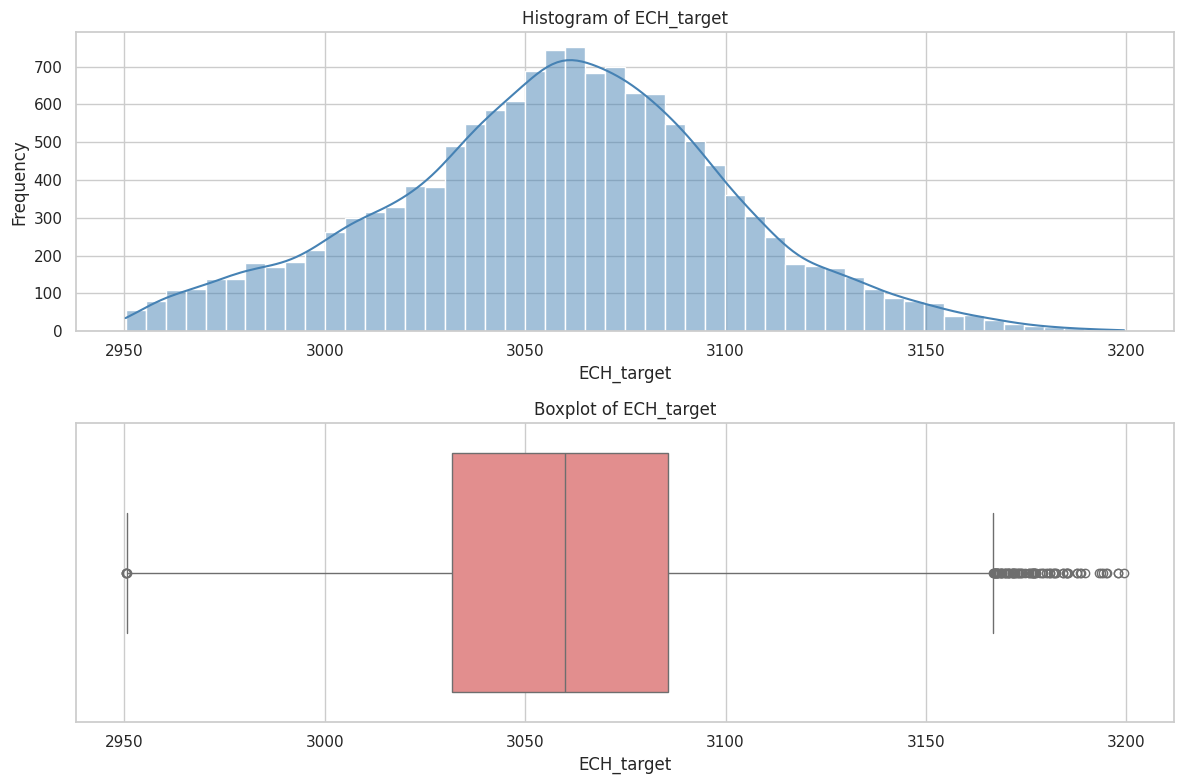

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

y = df['ECH_target']

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Histogram
sns.histplot(y, kde=True, ax=axes[0], bins=50, color='steelblue')
axes[0].set_title('Histogram of ECH_target')
axes[0].set_xlabel('ECH_target')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=y, ax=axes[1], color='lightcoral')
axes[1].set_title('Boxplot of ECH_target')
axes[1].set_xlabel('ECH_target')

plt.tight_layout()
plt.show()


/tmp/ipykernel_1777198/462524441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='correlation', y=top_corr_df.index, data=top_corr_df, palette=colors)


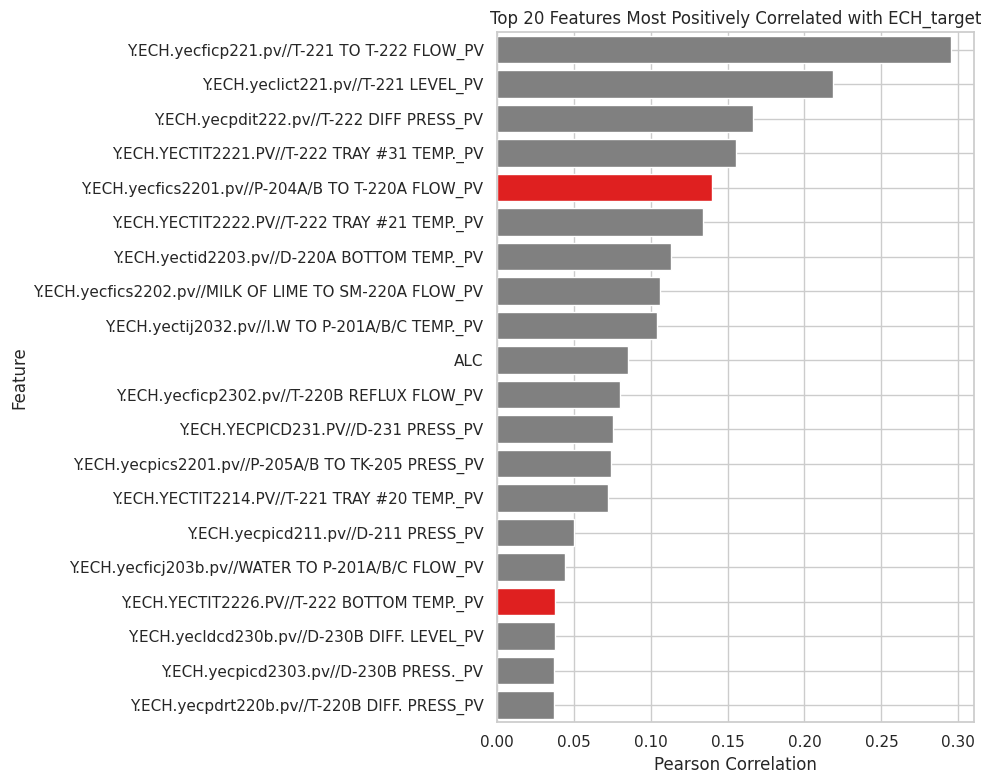

In [22]:
top_corr_df = top_corr.to_frame(name='correlation')
top_corr_df['is_control'] = top_corr_df.index.isin(df_control['tag'].tolist())

colors = ['red' if is_ctrl else 'gray' for is_ctrl in top_corr_df['is_control']]

plt.figure(figsize=(10, 8))
bars = sns.barplot(x='correlation', y=top_corr_df.index, data=top_corr_df, palette=colors)
plt.title('Top 20 Features Most Positively Correlated with ECH_target')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1777198/1663170775.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


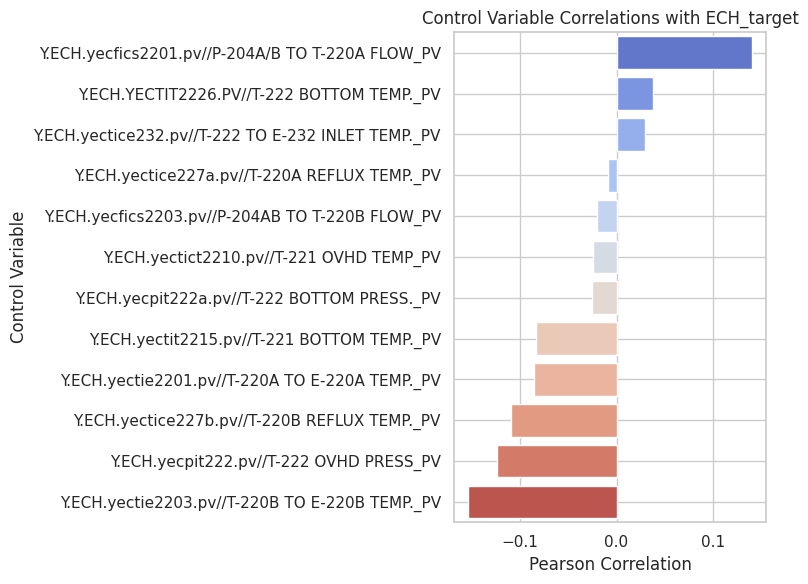

In [13]:
control_tags = df_control['tag'].tolist()
existing_tags = [tag for tag in control_tags if tag in df.columns]
missing_tags = [tag for tag in control_tags if tag not in df.columns]

corr_series = df[existing_tags].corrwith(df['ECH_target'])
corr_df = corr_series.sort_values(ascending=False).to_frame(name='Correlation_with_ECH_target')

colors = sns.color_palette("coolwarm", len(corr_df))

plt.figure(figsize=(8, 0.5 * len(corr_df)))
sns.barplot(
    x='Correlation_with_ECH_target',
    y=corr_df.index,
    data=corr_df,
    orient='h',
    palette=colors
)
plt.title('Control Variable Correlations with ECH_target')
plt.xlabel('Pearson Correlation')
plt.ylabel('Control Variable')
plt.grid(True)
plt.tight_layout()
plt.show()



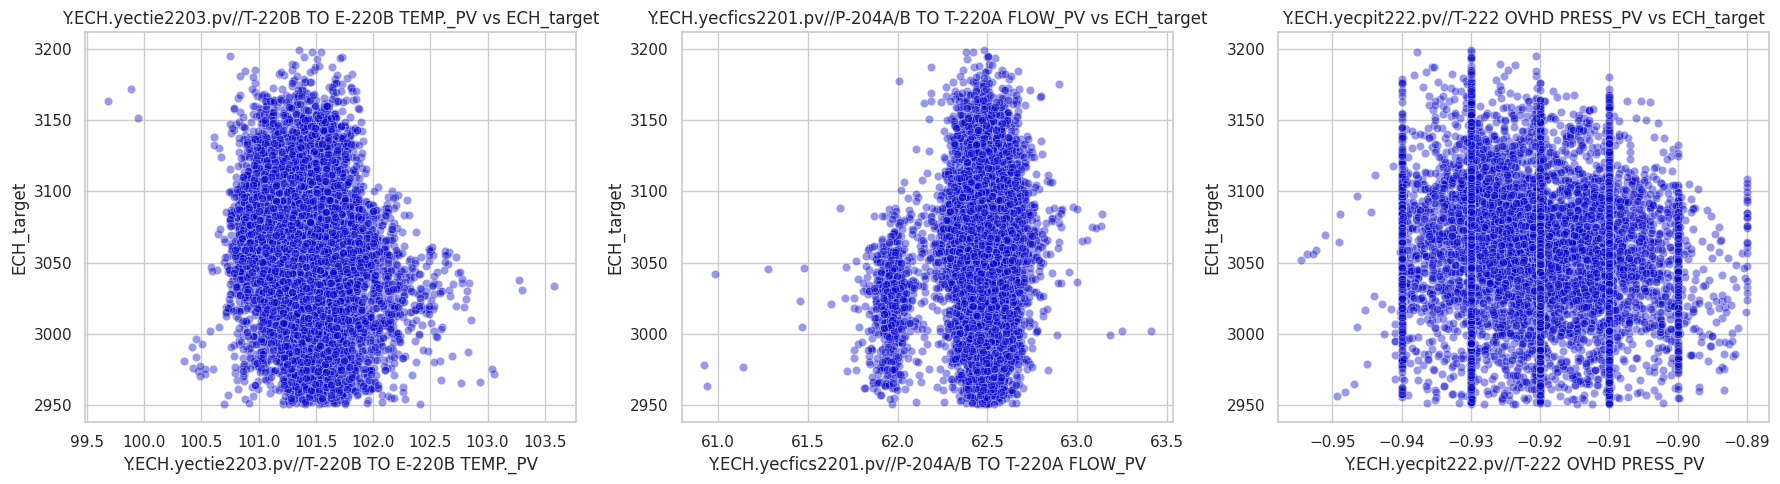

In [14]:
top3_vars = corr_df['Correlation_with_ECH_target'].abs().sort_values(ascending=False).head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(top3_vars):
    sns.scatterplot(x=df[var], y=df['ECH_target'], ax=axes[i], alpha=0.4, color='mediumblue')
    axes[i].set_title(f'{var} vs ECH_target')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('ECH_target')

plt.tight_layout()
plt.show()


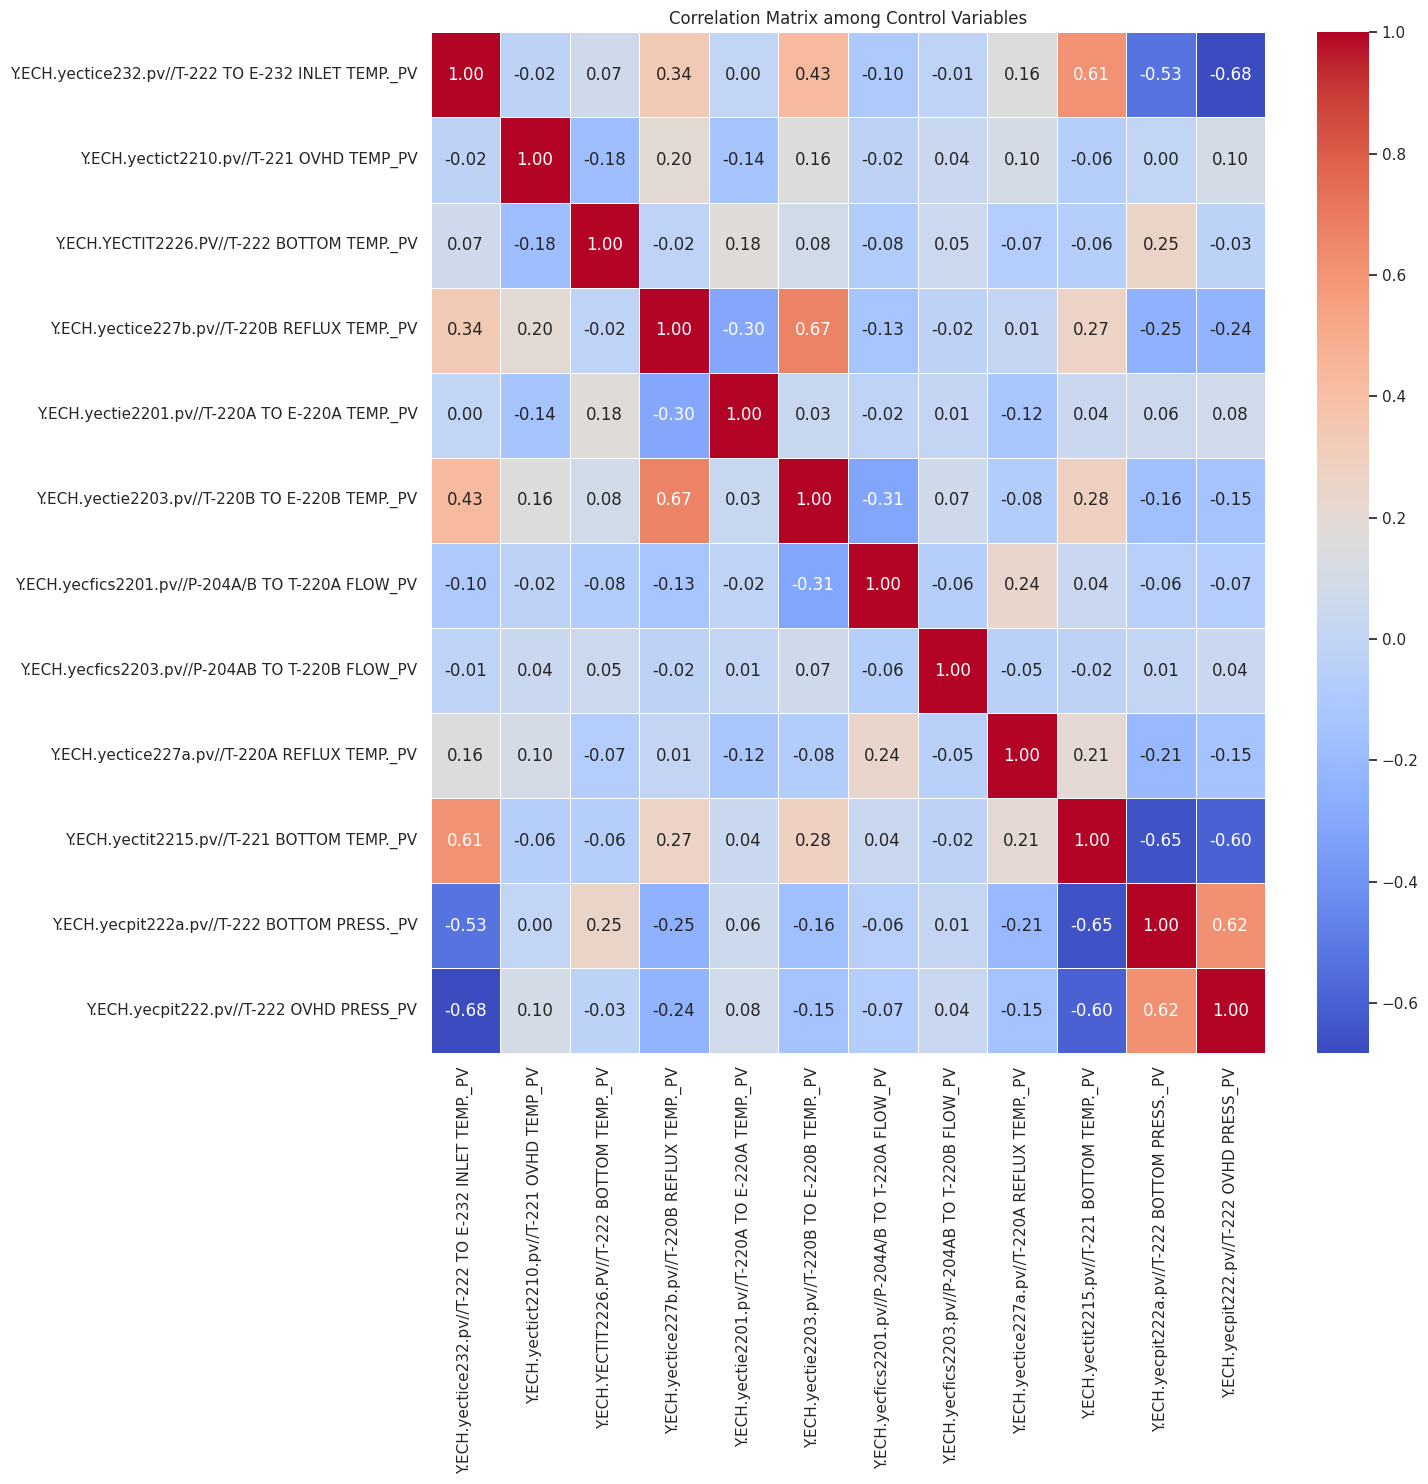

In [19]:
control_vars = [tag for tag in df_control['tag'] if tag in df.columns]

control_corr = df[control_vars].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(control_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix among Control Variables')
plt.tight_layout()
plt.show()


# Corr btw ECH and WASTE

Corr: 0.030


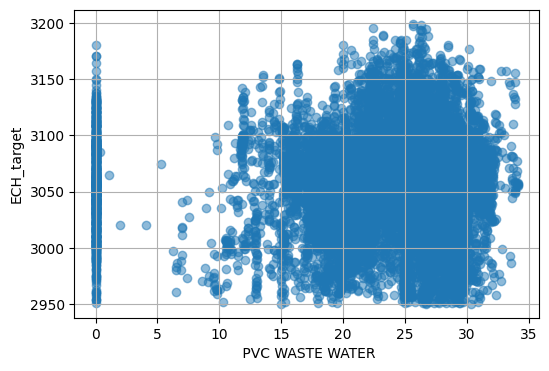

In [8]:
production_col = 'ECH_target'
waste_col = 'Y.ECH.yecfick204.pv//PVC WASTE WATER TO TK204_PV'


corr_value = df[production_col].corr(df[waste_col])
print(f"Corr: {corr_value:.3f}")

plt.figure(figsize=(6, 4))
plt.scatter(df[waste_col], df[production_col], alpha=0.5)
plt.xlabel(' PVC WASTE WATER')
plt.ylabel('ECH_target')

plt.grid(True)
plt.show()

# Corr btw WASTE and Target

/tmp/ipykernel_1777198/2974712885.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


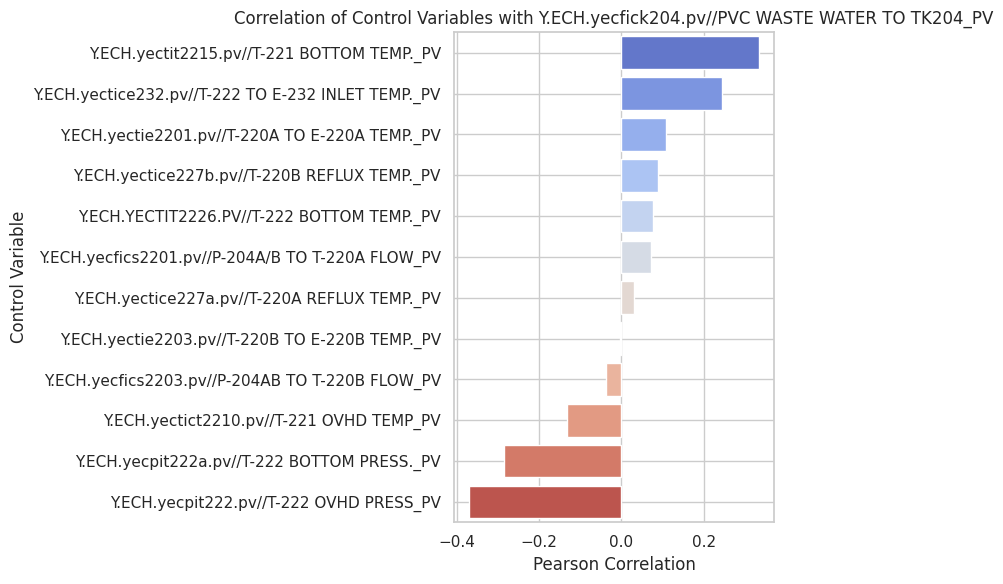

In [18]:
target_var = 'Y.ECH.yecfick204.pv//PVC WASTE WATER TO TK204_PV'
corr_series = df[existing_tags].corrwith(df[target_var])
corr_df = corr_series.sort_values(ascending=False).to_frame(name='Correlation_with_' + target_var)

plt.figure(figsize=(8, 0.5 * len(corr_df)))
sns.barplot(
    x='Correlation_with_' + target_var,
    y=corr_df.index,
    data=corr_df,
    palette='coolwarm',
    orient='h'
)
plt.title(f'Correlation of Control Variables with {target_var}')
plt.xlabel('Pearson Correlation')
plt.ylabel('Control Variable')
plt.grid(True)
plt.tight_layout()
plt.show()
